 <center>

# Задача бинарной классификации. Метод k-ближайших соседей (kNN - K-Nearest-Neighbors)

</center>

In [ ]:
!$ pip install numpy scipy scikit-learn matplotlib pandas

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


%matplotlib inline
plt.rcParams["figure.figsize"] = [15, 15]

import warnings
warnings.filterwarnings("ignore")

## KNN в задаче классификации

In [2]:
X, y = datasets.make_blobs(n_samples=100, random_state=42, centers=2, cluster_std=2)
X[:5], y[:5]

(array([[-3.4675461 ,  8.64296817],
        [ 6.80598132,  4.08077379],
        [-3.59796307,  9.23613131],
        [ 6.28399916,  5.76675565],
        [ 5.09479871,  4.58745519]]),
 array([0, 1, 0, 1, 1]))

In [3]:
def get_class_colour(class_label):
    return 'green' if class_label else 'blue'

In [4]:
def plot_points(X, y, new_points=None, new_prediction=None, nearest_points=None, file_name=None):
    plt.figure(figsize=(10, 10))
    plt.scatter(X[:, 0], X[:, 1], c=[get_class_colour(y_i) for y_i in y], s=100, edgecolor='black', alpha=0.3)
    
    if new_points is not None:
        plt.scatter(new_points[:, 0], new_points[:, 1], c='black', s=100, edgecolor='black')
    
    if new_prediction is not None:
        plt.scatter(new_points[:, 0], new_points[:, 1], c=[get_class_colour(y_i) for y_i in new_prediction], s=100, edgecolor='black')
        
    if nearest_points is not None:
        plt.scatter(nearest_points[:, 0], nearest_points[:, 1], c='red', s=100, edgecolor='black')
    
    plt.title("Задача классификации: \n Каков цвет для новой пары точек (x1, x2)?")
    plt.xlabel("x1 (признак)")
    plt.ylabel("x2 (признак)")
    
    if file_name:
        plt.savefig(file_name)

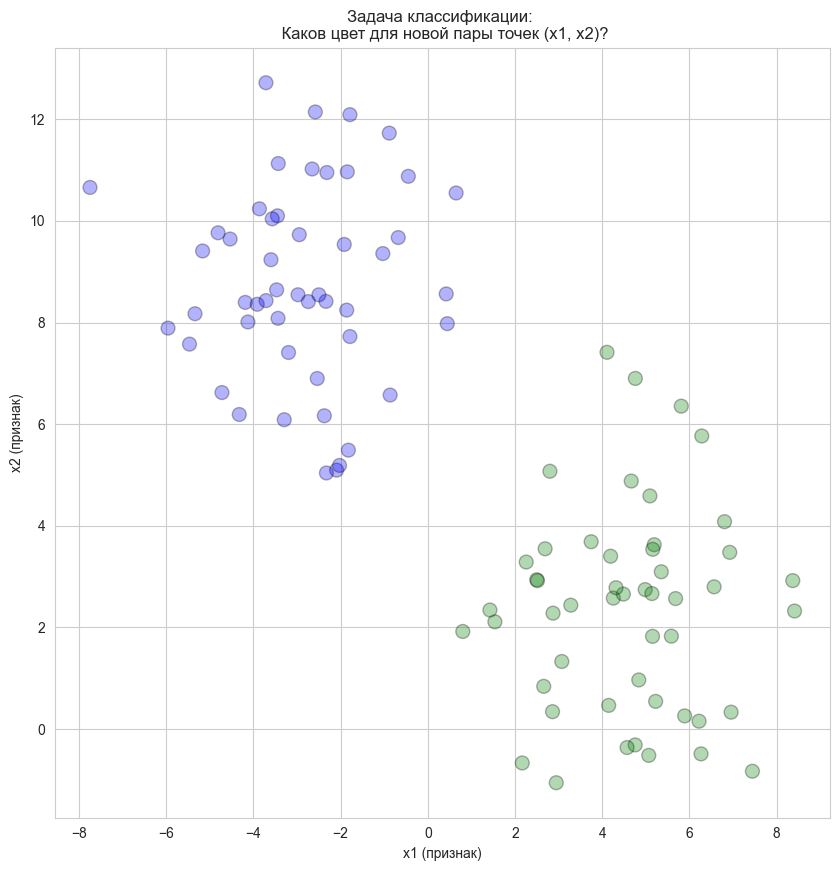

In [5]:
plot_points(X, y)

In [6]:
X_new = np.array([[4, 8]])

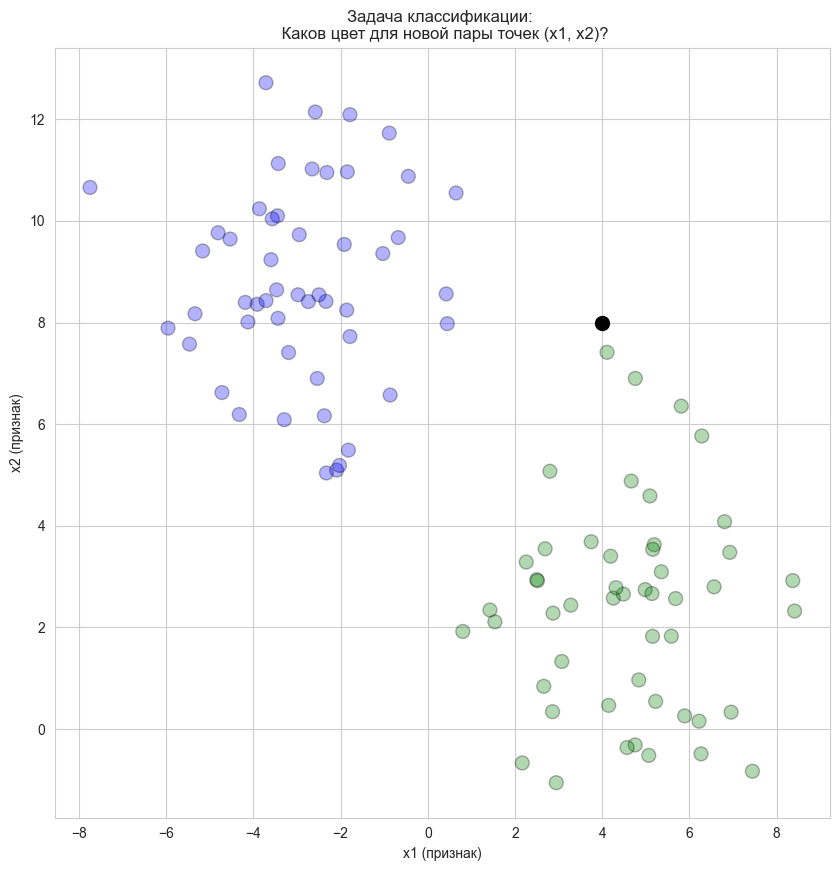

In [7]:
plot_points(X, y, new_points=X_new)

In [9]:
print(X)

[[-3.4675461   8.64296817]
 [ 6.80598132  4.08077379]
 [-3.59796307  9.23613131]
 [ 6.28399916  5.76675565]
 [ 5.09479871  4.58745519]
 [-1.78640641 12.09035926]
 [ 5.19326043  3.62753618]
 [ 1.53855197  2.11029563]
 [-3.29341393  6.08725623]
 [-4.18763267  8.39586138]
 [-2.37414121  6.16478976]
 [ 2.16597741 -0.66774354]
 [-3.44814639 10.09940622]
 [-5.16556972  9.4080086 ]
 [ 3.27982939  2.43767708]
 [ 3.07337225  1.32904665]
 [ 4.76033926  6.89965391]
 [ 2.49809384  2.93811451]
 [ 4.75629627 -0.31277091]
 [-2.32567607  5.0391483 ]
 [ 5.06806632 -0.51830787]
 [ 4.25515691  2.57626437]
 [ 6.22194273  0.15439477]
 [ 6.56663109  2.79873154]
 [ 5.15964442  3.53681543]
 [ 0.64922801 10.54915559]
 [ 4.48567542  2.65547363]
 [-0.88414598 11.72676619]
 [ 5.68376197  2.56713903]
 [ 4.11056517  7.41350802]
 [-2.97750437  8.54601221]
 [-5.4662416   7.57459771]
 [-4.81118478  9.76568216]
 [ 0.42209991  8.56273353]
 [-1.82196104  5.48820582]
 [ 5.81359302  6.35408094]
 [ 4.98624069  2.74380444]
 

In [11]:
print(X_new.shape)

(1, 2)


In [12]:
from scipy.spatial.distance import euclidean

def find_nearest_point_index(x_new, X):
    d_min = euclidean(x_new[0], X[0])
    min_idx = 0
    for idx in range(1, X.shape[0]):
        d = euclidean(x_new[0], X[idx])
        if d < d_min:
            d_min = d
            min_idx = idx
    return min_idx

In [13]:
min_idx = find_nearest_point_index(X_new, X)

In [14]:
print(min_idx)

29


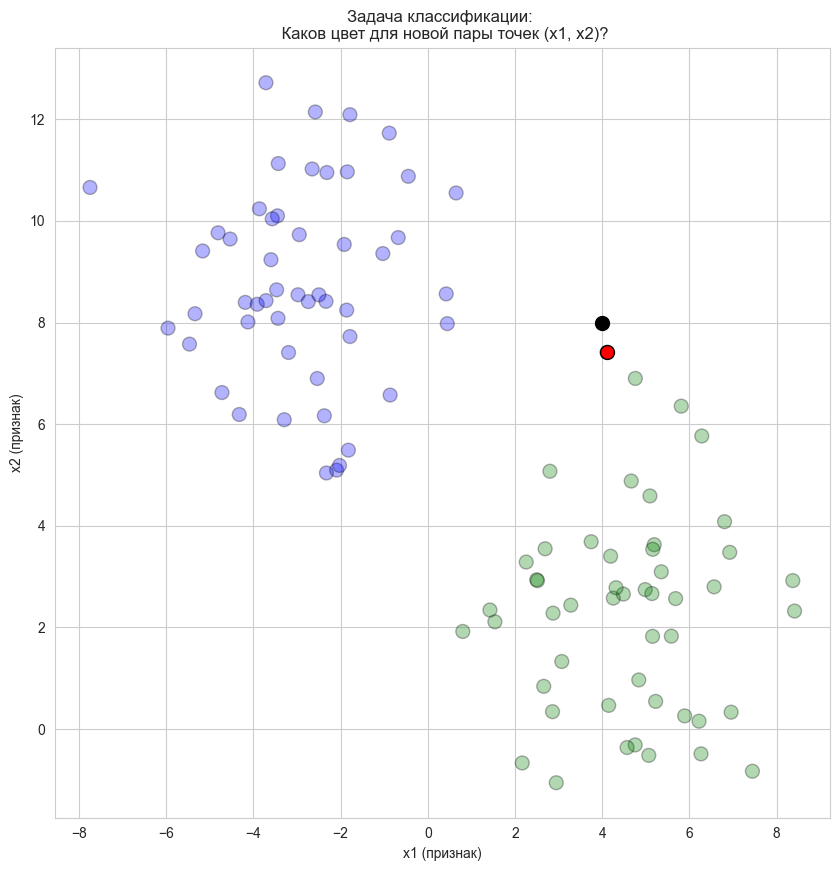

In [15]:
plot_points(X, y, new_points=X_new, nearest_points=X[[min_idx]])

In [16]:
def predict_class(x_new, X, y):
    min_idx = find_nearest_point_index(x_new, X)
    return y[min_idx]

y_new = predict_class(X_new, X, y)

In [17]:
print(y_new)

1


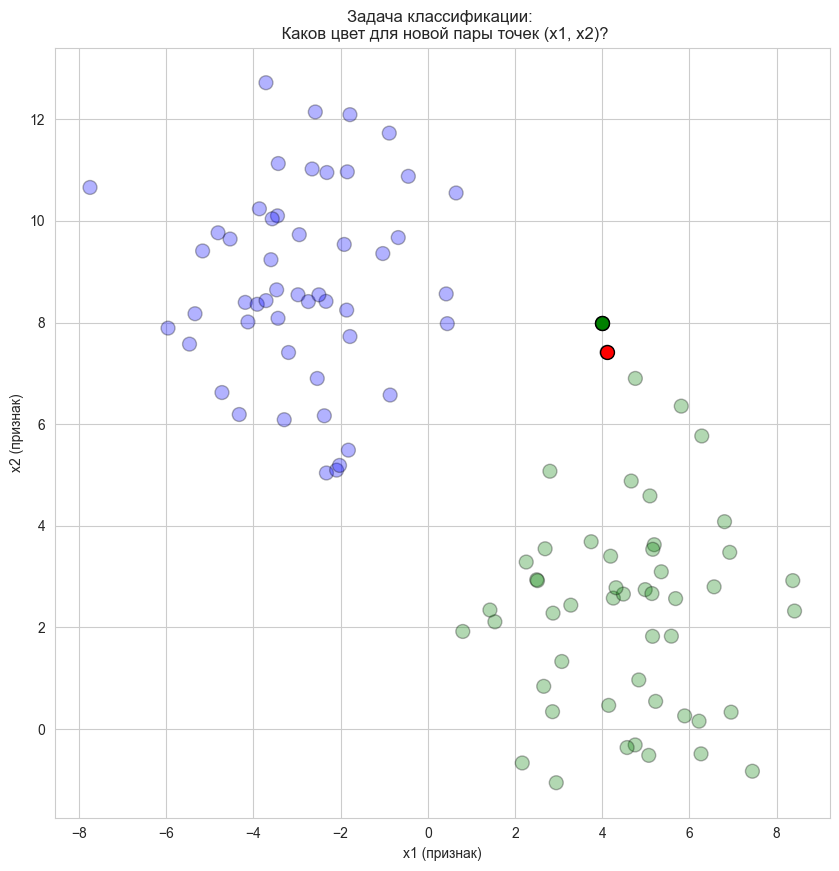

In [18]:
plot_points(X, y, new_points=X_new, new_prediction=[y_new], nearest_points=X[[min_idx]])

In [19]:
X_new = np.array([[12, -2]])
min_idx = find_nearest_point_index(X_new, X)
y_new = predict_class(X_new, X, y)

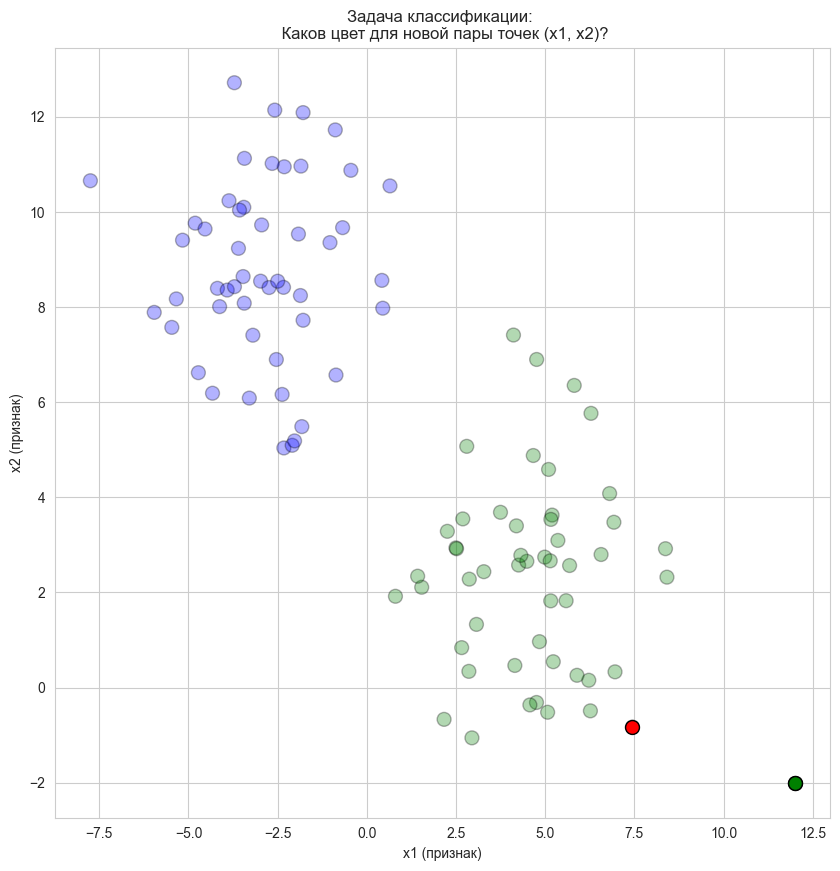

In [20]:
plot_points(X, y, new_points=X_new, new_prediction=[y_new], nearest_points=X[[min_idx]])

## Sklearn

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X_new)


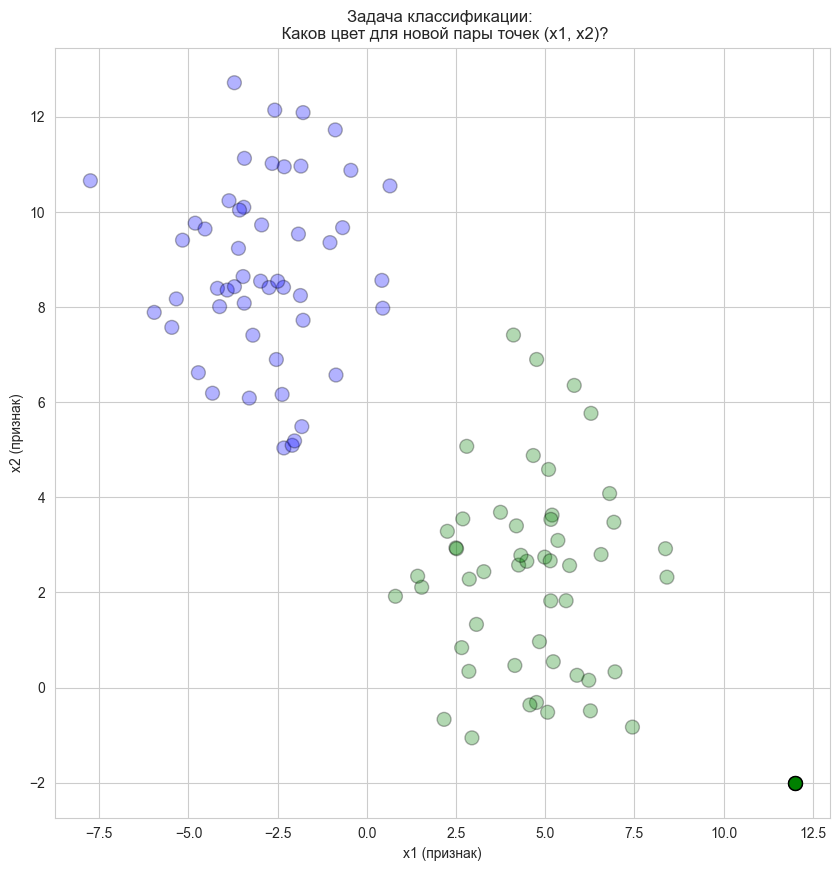

In [22]:
plot_points(X, y, new_points=X_new, new_prediction=[y_pred])

In [23]:
X_new = np.c_[np.random.randint(5, 15, 10), np.random.randint(-2, 8, 10)]

In [25]:
print(X_new)

[[10  3]
 [ 7 -1]
 [14  2]
 [ 7  7]
 [12  5]
 [12  6]
 [13  2]
 [12  2]
 [ 6  0]
 [12  1]]


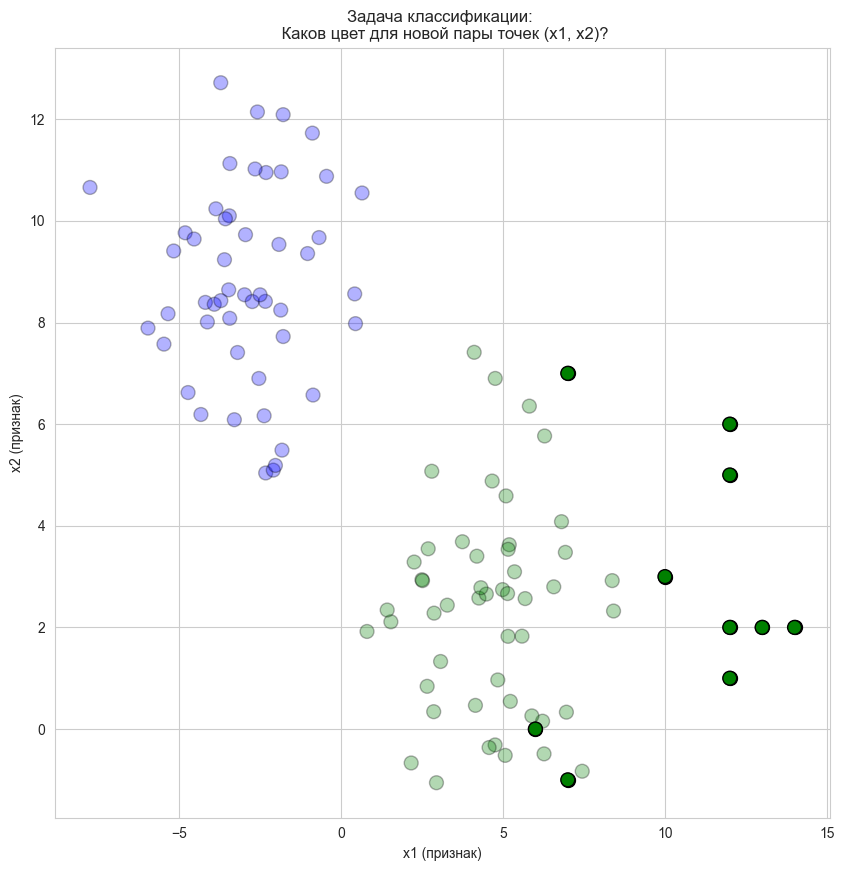

In [26]:
plot_points(X, y, new_points=X_new, new_prediction=knn.predict(X_new))

In [27]:
from scipy.spatial.distance import cdist
from collections import Counter

def predict_class(x_new, X, y, k=1):
    # cdist рассчитывает попарные расстояния между объектами
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html
    dist = cdist(x_new, X)
    
    # argpartition находит отсортированные индексы 
    # https://docs.scipy.org/doc/numpy/reference/generated/numpy.argpartition.html
    nearest_y = y[np.argpartition(dist, k, axis=1)[:, :k]]
    return np.array([Counter(row).most_common(1)[0][0] for row in nearest_y])

In [28]:
y_pred = predict_class(X_new, X, y, k=3)

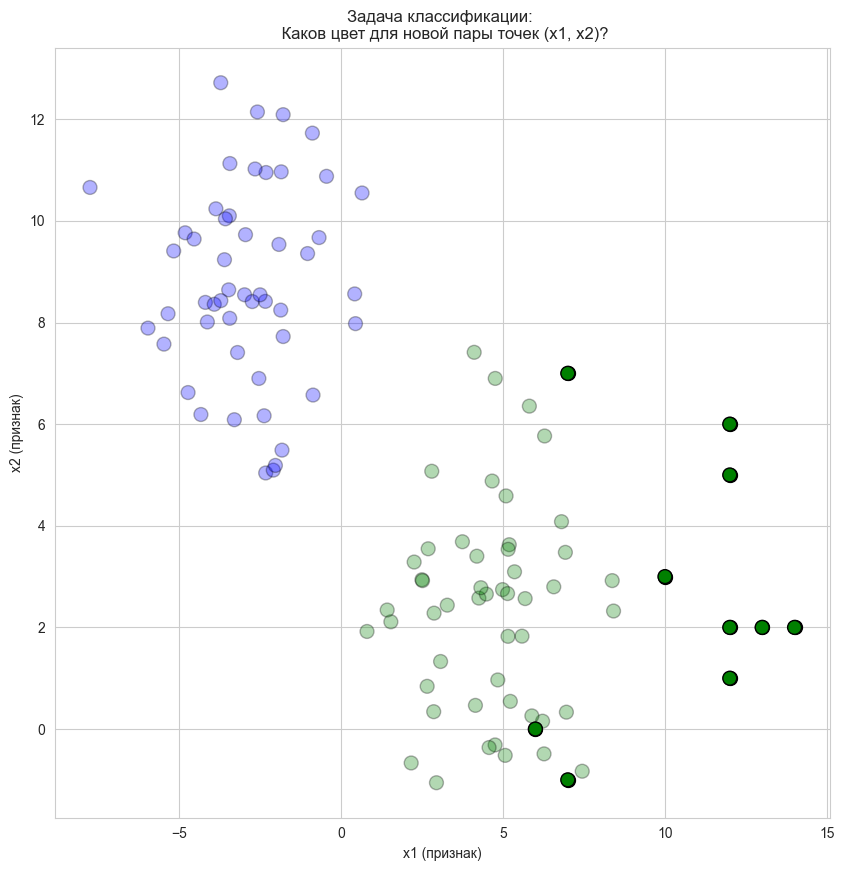

In [29]:
plot_points(X, y, new_points=X_new, new_prediction=y_pred)

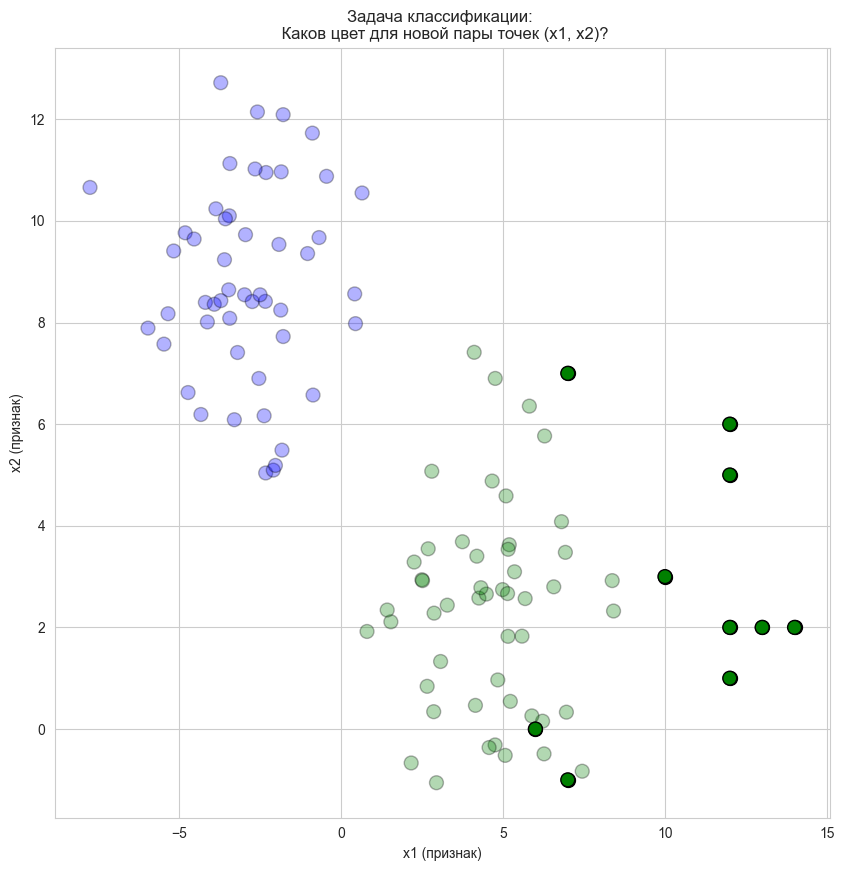

In [30]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
y_pred = knn.predict(X_new)
plot_points(X, y, new_points=X_new, new_prediction=y_pred)

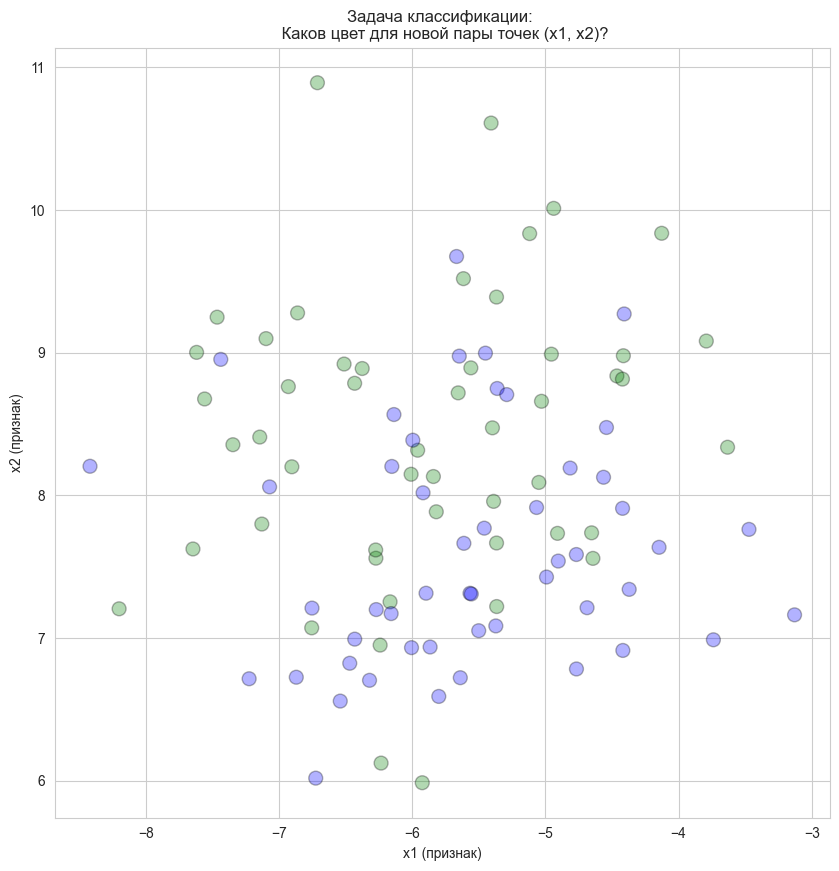

In [31]:
X, y = datasets.make_blobs(n_samples=100, random_state=5, centers=2)
plot_points(X, y)

# Влияние числа соседей k

In [32]:
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
x_pred = np.c_[xx.ravel(), yy.ravel()]

In [33]:
def plot_knn_classifier(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    Z = knn.predict(x_pred)
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(12, 8))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()

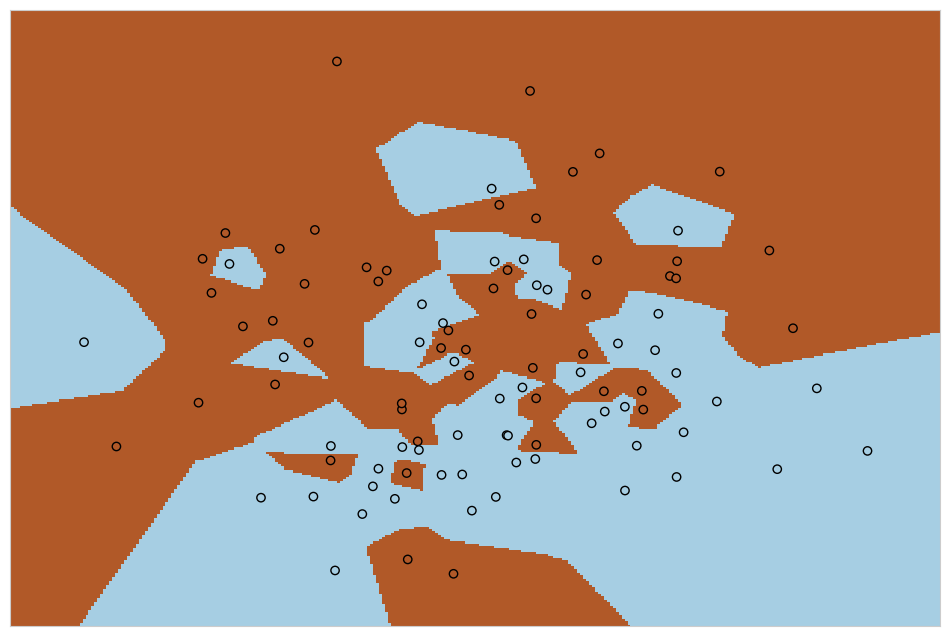

In [34]:
plot_knn_classifier(1)

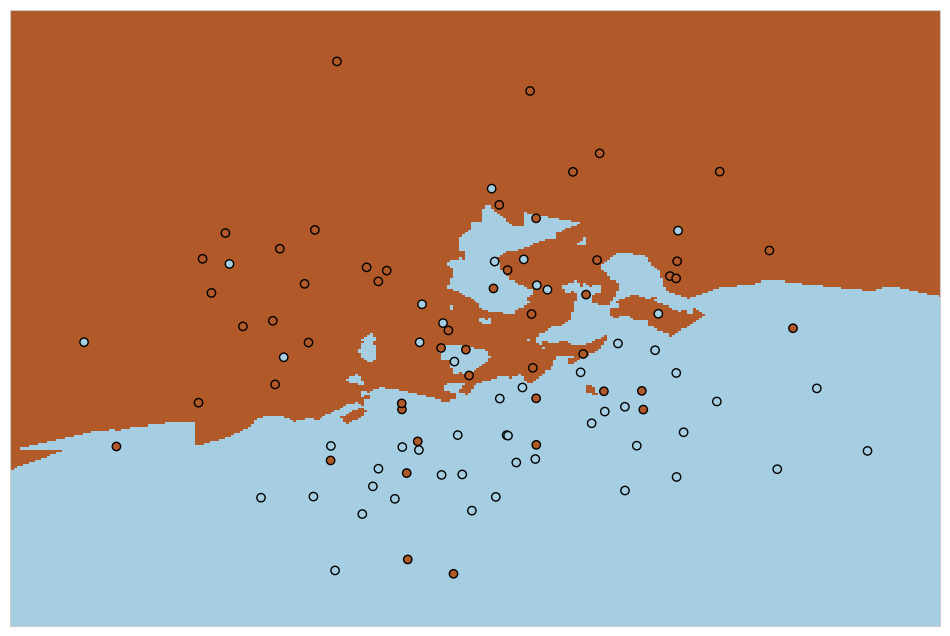

In [35]:
plot_knn_classifier(10)

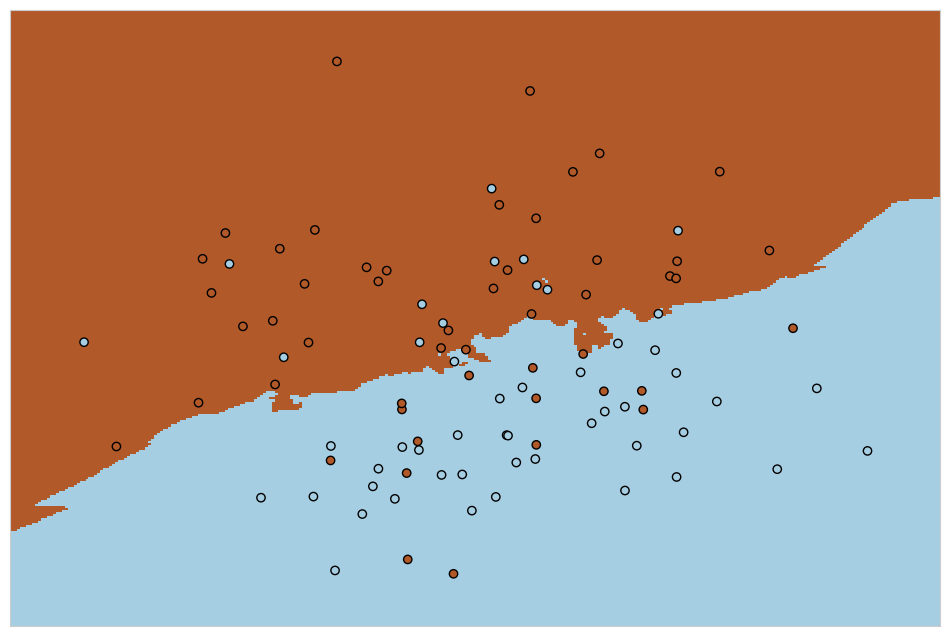

In [36]:
plot_knn_classifier(30)

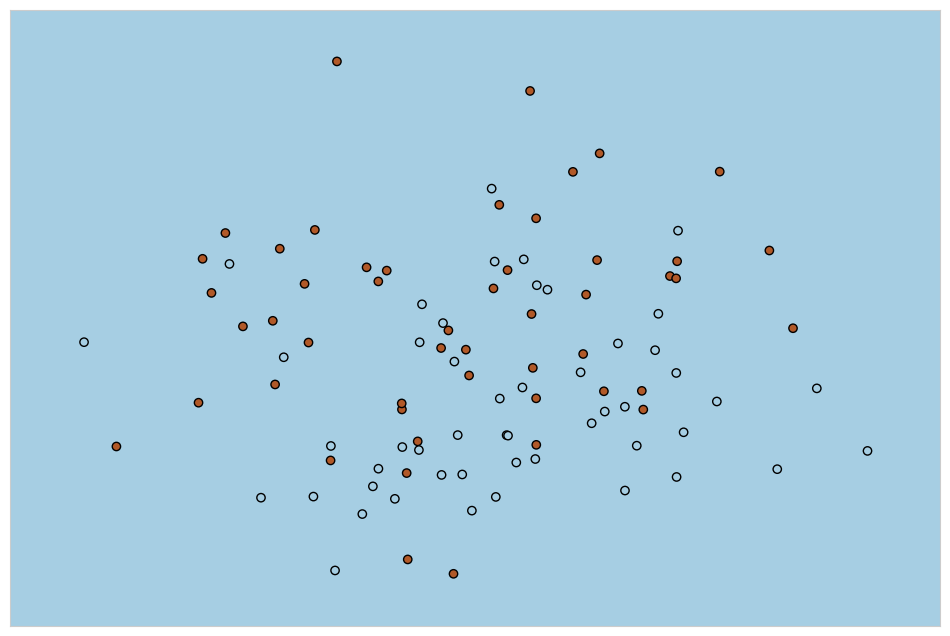

In [38]:
plot_knn_classifier(100)

# Нормализация данных в knn

In [39]:
X, y = datasets.make_blobs(n_samples=100, random_state=4, centers=2, cluster_std=2)
X[:, 1] *= 1_000_000_000
X[:5], y[:5]

(array([[1.37873172e+01, 1.73323541e+09],
        [1.06807525e+01, 3.87600675e+09],
        [8.09139034e+00, 3.64290431e+08],
        [1.08012902e+01, 6.34922981e+09],
        [8.78819007e+00, 2.53766878e+09]]),
 array([0, 1, 1, 1, 0]))

In [40]:
def plot_points_scaled(X, y, new_points=None, new_prediction=None, nearest_points=None, file_name=None):
    plt.scatter(X[:, 0], X[:, 1], c=[get_class_colour(y_i) for y_i in y], s=100, edgecolor='black', alpha=0.3)
    plt.figure(1, figsize=(12, 8))
    plt.title("Classification problem \n What is the color for the new (x1, x2) pair?")
    plt.xlabel("x1 (feature)")
    plt.ylabel("x2 (feature)")
    plt.gca().set_aspect('equal', adjustable='datalim')
    if file_name:
        plt.savefig(file_name)

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [44]:
def quality(prediction_y, true_y):
    accuracy = accuracy_score(prediction_y, true_y)
    precision = precision_score(prediction_y, true_y)
    recall = recall_score(prediction_y, true_y)
    f1 = f1_score(prediction_y, true_y)
    print("Accuracy:  {:.3f}\nPrecision: {:.3f}\nRecall:    {:.3f}\nF1-score:  {:.3f}".format(
        accuracy, precision, recall, f1
    ))

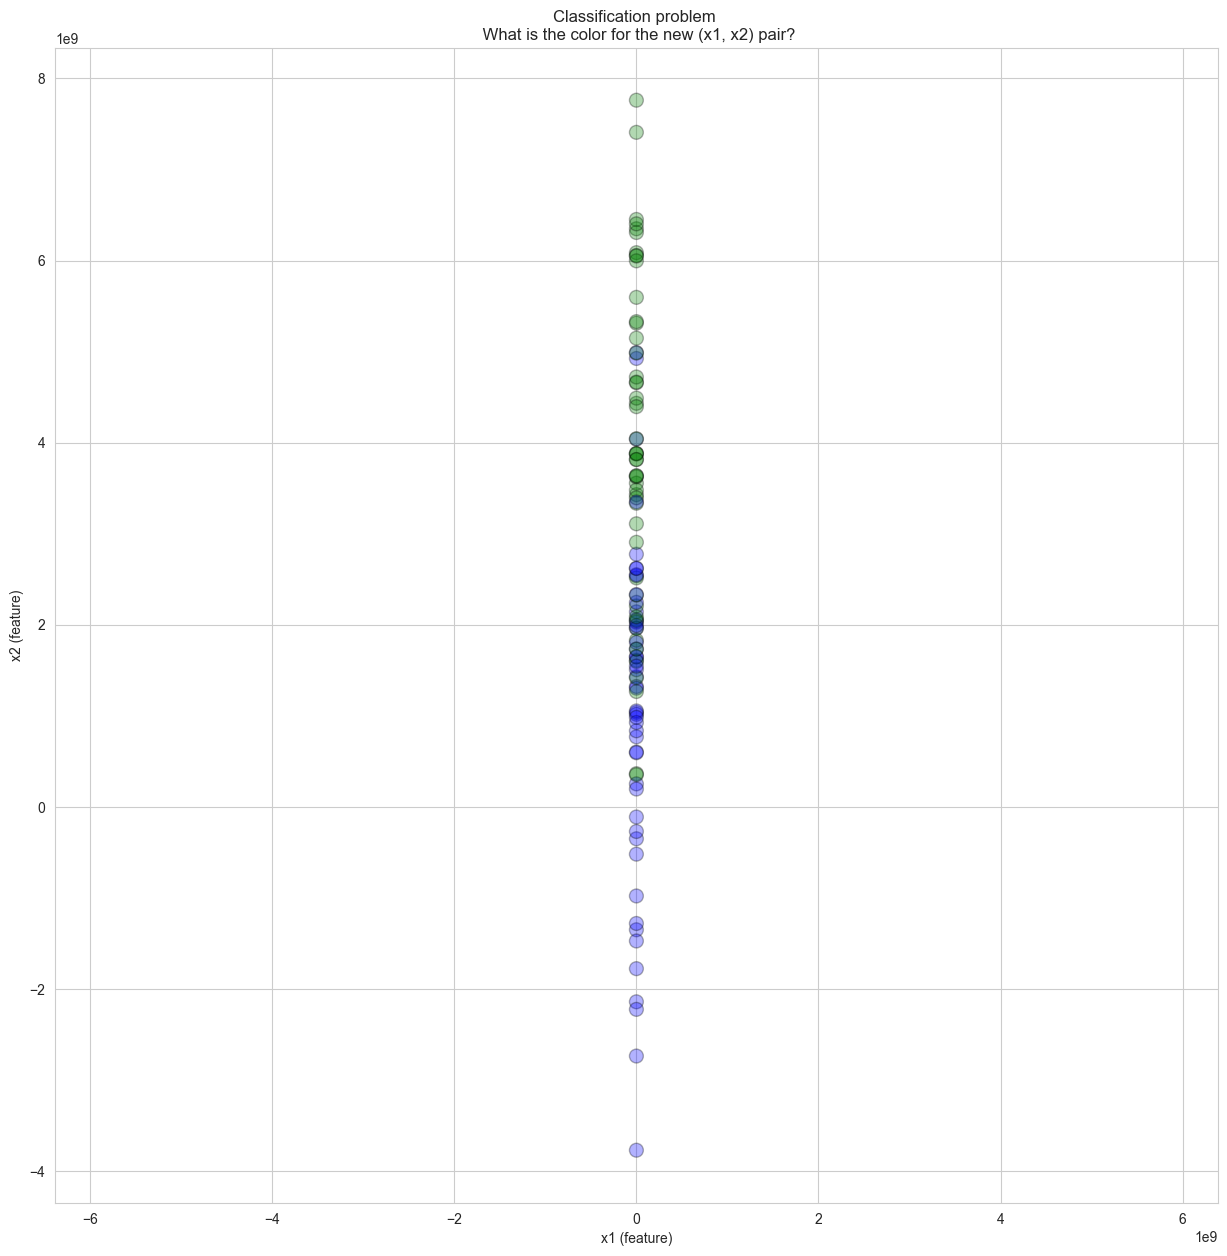

In [45]:
plot_points_scaled(X, y)

In [46]:
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
quality(y_pred, y)

Accuracy:  0.810
Precision: 0.760
Recall:    0.844
F1-score:  0.800


In [47]:
from sklearn.preprocessing import MinMaxScaler
X_scaled = MinMaxScaler().fit_transform(X)

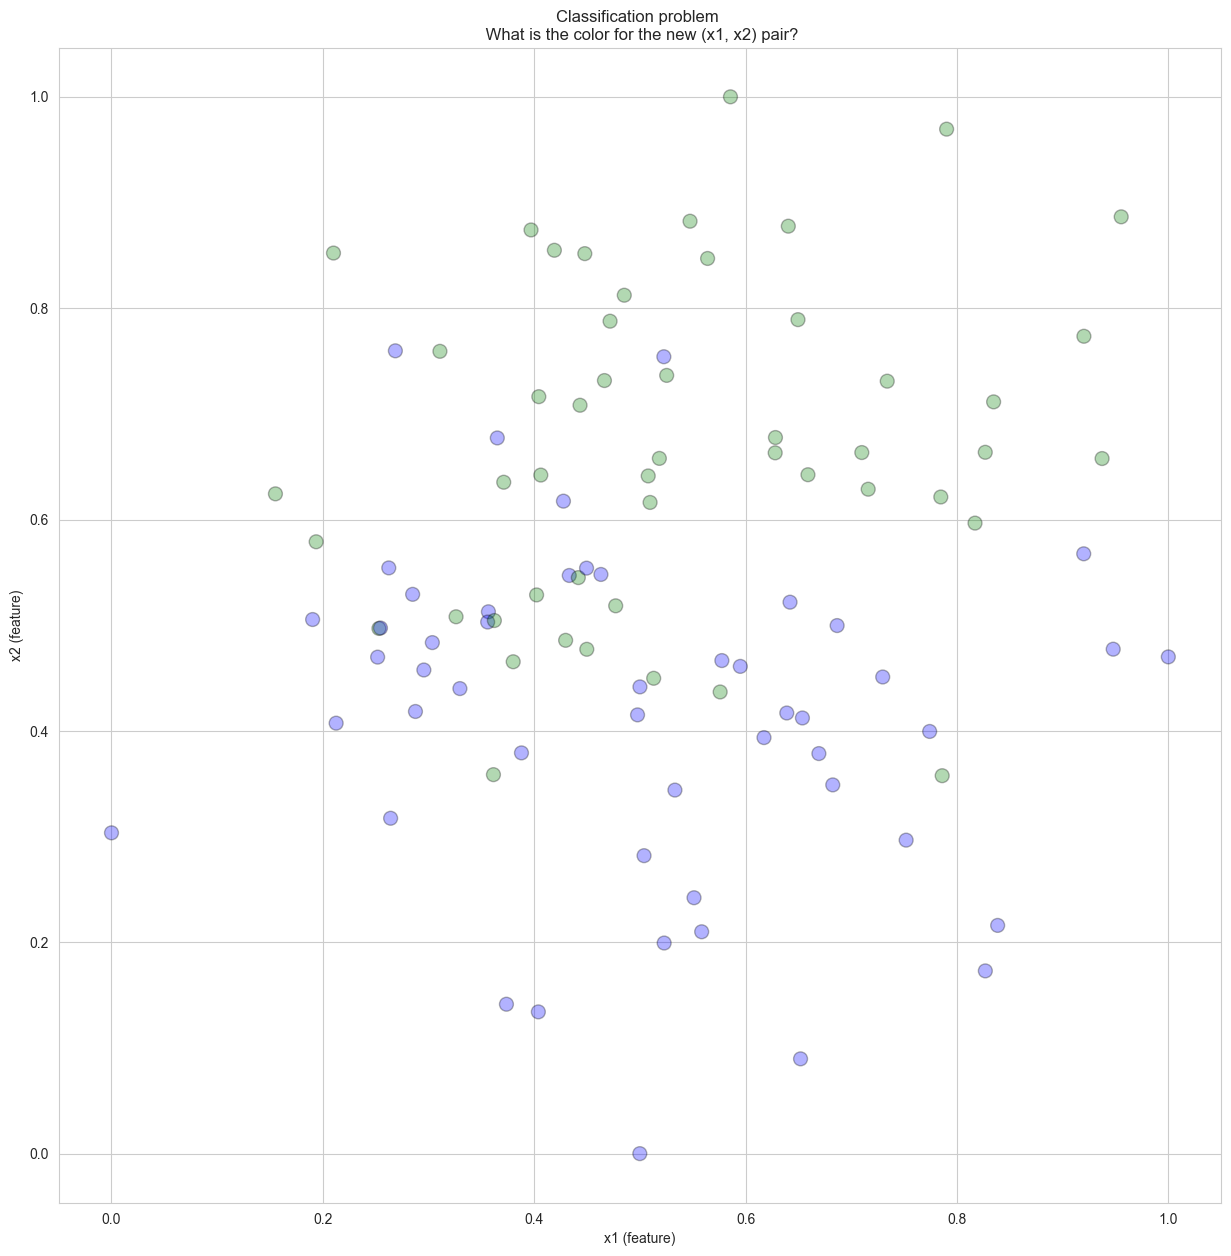

In [48]:
plot_points_scaled(X_scaled, y)

In [49]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_scaled, y)
y_pred = knn.predict(X_scaled)
quality(y_pred, y)

Accuracy:  0.870
Precision: 0.860
Recall:    0.878
F1-score:  0.869


# Выбор параметров модели

## Начинаем запутываться

**Testing set** - в самом начале работы откладываем часть данных и не используем их до внедрения модели в боевое окружение. Это наш финальный и самый верный способ проверить качество готовой модели. 

**Training set** - используется для непосредственной тренировки модели, эти данные модель "видит" во время обучения

**Validation set** - этот набор даннных модель "не видит" во время тренировки, но мы его используем для настройки гиперпараметров, то есть проверяем качество обученной модели и если мы им недовольны - меняем параметры модели и повторяем процедуру. Таким образом, модель хоть напрямую с этими данными и не работает, информацию из них мы всё равно многократно используем и она просачивается в модель в виде настроенных параметров. Т.е., качество модели на валидационной выборке может быть завышено. 


В `sklearn.model_selection` есть функция `train_test_split`, которая случайным (или не очень, если мы того хотим) образом делит выборку на две части. Вместо train и validation их чаще всего (на самом деле всегда) называют train и test, подразумевая, при этом, что истинная "тестовая" выборка хранится отдельно и будет использована в будущем после настройки модели.


"<img src="/Users/maratmovlamov/Desktop/Projects/DS_Foundations/module_3/classification_algorithms/pics/vtt.png">"


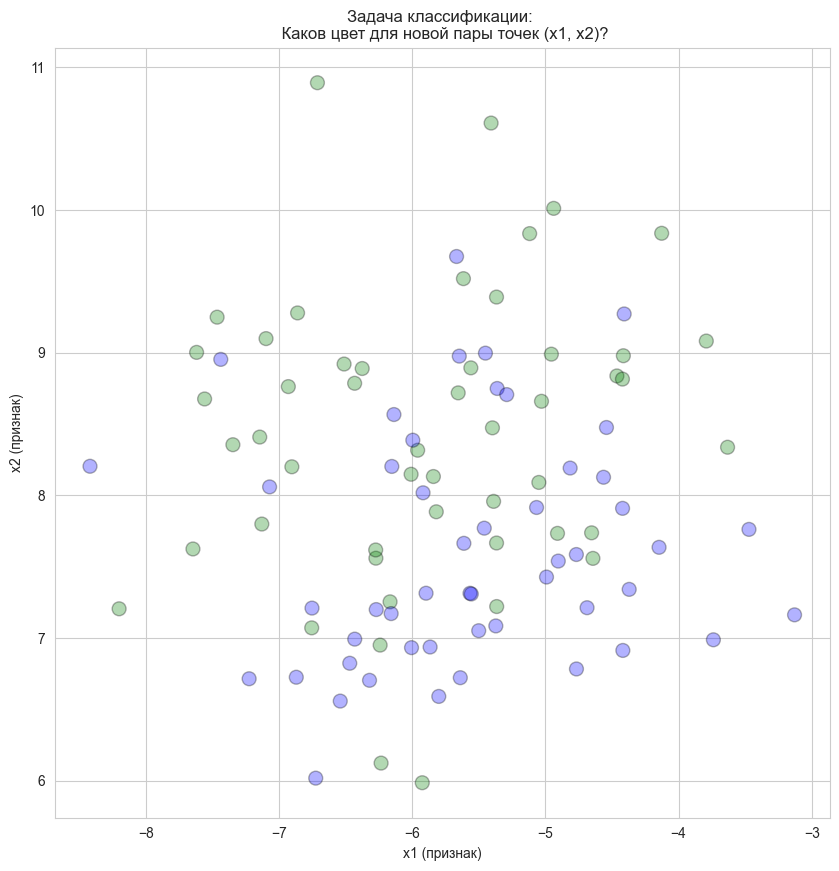

In [50]:
X, y = datasets.make_blobs(n_samples=100, random_state=5, centers=2)
plot_points(X, y)

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [52]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((60, 2), (40, 2), (60,), (40,))

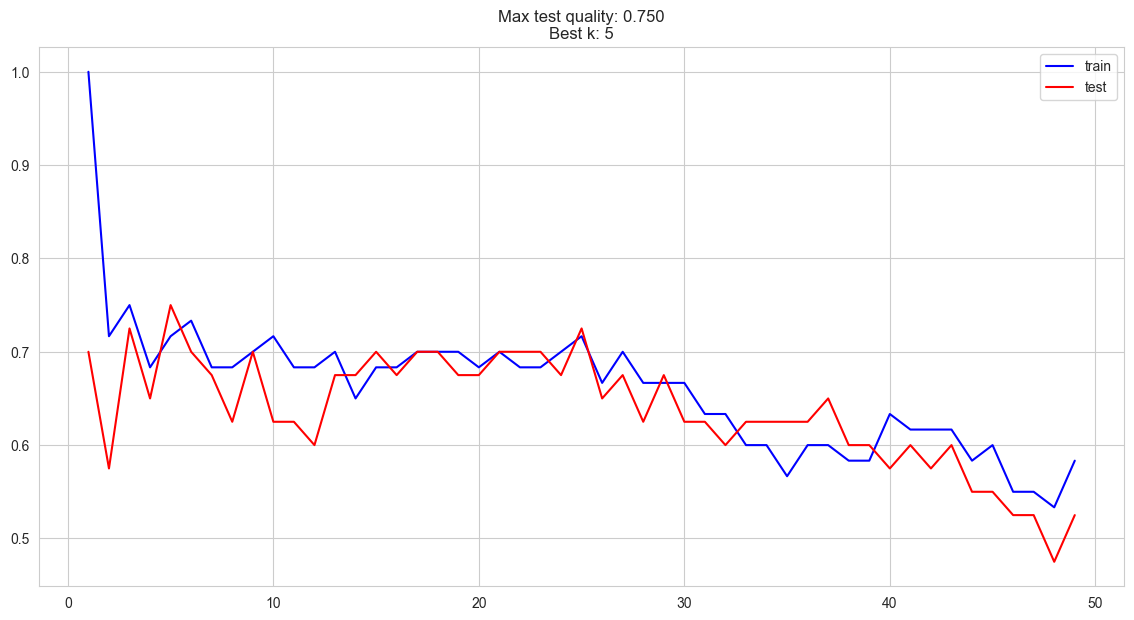

In [53]:
neighbors = range(1, 50)
accuracy_train = []
accuracy_test = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy_train.append(accuracy_score(knn.predict(X_train), y_train))
    accuracy_test.append(accuracy_score(knn.predict(X_test), y_test))

plt.figure(figsize=(14, 7))
plt.plot(neighbors, accuracy_train, color='blue', label='train')
plt.plot(neighbors, accuracy_test, color='red', label='test')
plt.title("Max test quality: {:.3f}\nBest k: {}".format(max(accuracy_test), np.argmax(accuracy_test)+1))
plt.legend()
plt.show()

((600, 2), (400, 2), (600,), (400,))

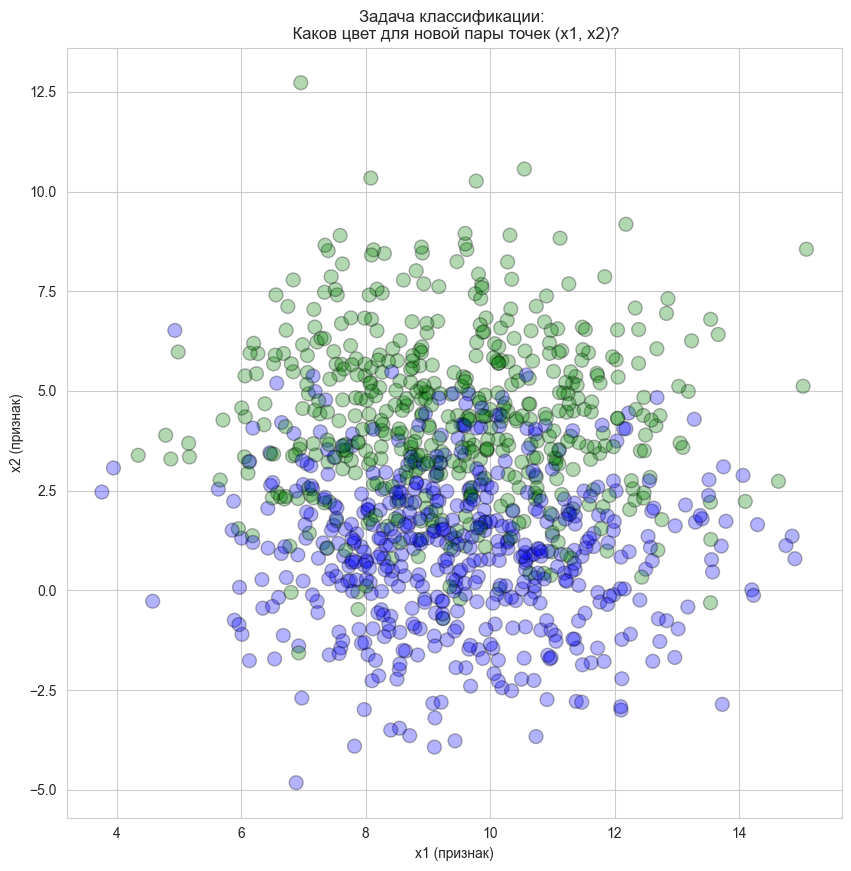

In [58]:
X, y = datasets.make_blobs(n_samples=1000, random_state=4, centers=2, cluster_std=2)
plot_points(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

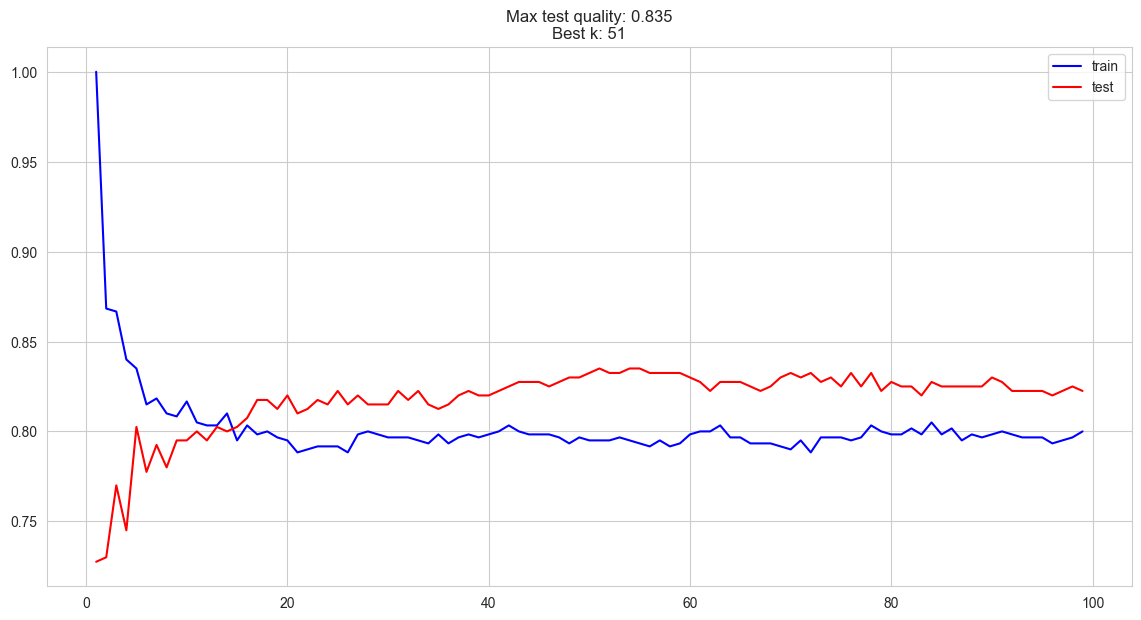

In [59]:
from sklearn.metrics import accuracy_score

neighbors = range(1, 100)
accuracy_train = []
accuracy_test = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy_train.append(accuracy_score(knn.predict(X_train), y_train))
    accuracy_test.append(accuracy_score(knn.predict(X_test), y_test))

plt.figure(figsize=(14, 7))
plt.plot(neighbors, accuracy_train, color='blue', label='train')
plt.plot(neighbors, accuracy_test, color='red', label='test')
plt.title("Max test quality: {:.3f}\nBest k: {}".format(max(accuracy_test), np.argmax(accuracy_test)+1))
plt.legend()
plt.show()

## Кросс-валидация (k-fold cross-validation)

Иногда данных не то чтобы очень много, а потестировать модель всё же хочется, да и получить устойчивые и надежные оценки качества модели - тоже не так плохо. 

Для такого случая была придумана очень полезная техника, использующася повсеместно - кросс-валидация. Наш изначальный датасет мы теперь будем делить не на train-validation-test, а на гораздо большее количество кусочков. В самом начале снова можно отложить тестовую выборку, на которой в самом конце мы проверим качество готовой модели. Далее берем оставшийся тренировочный датасет и делим его на папки (фолды, folds).

Например, задаём число фолдов равным 6 (обычно берется 3 или 5, но на картинке 6 блоков, так что для соответствия будем использовать 6). Теперь мы делим нашу тренировочную выборку на 6 равных кусков. На пяти их них обучаем модель, на шестом - меряем качество. Теперь берем другое сочетание фолдов и снова повторяем обучение/тестирование. Продолжаем, пока каждый из фолдов не поучаствовал в тестировании. Таким образом, мы получаем столько оценок качества, сколько изначально задали фолдов, и столько же раз нам пришлось нашу модель обучать и тестировать. Теперь эти оценки мы можем усреднить, посчитать стандартное отклонение и узнать как, в среднем, ошибается наша модель и какие интервалы у этой ошибки. 

Вычислительно кросс-валидации крайне затратна, но если модель учится быстро, а датасет не сильно большой - это отличный способ получить "честные" оценки качества модели.

"<img src='../pics/cv.png'>"

In [60]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=3)

scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print(scores)
print('mean', scores.mean())
print('std', scores.std())

[0.74  0.745 0.775 0.745 0.785]
mean 0.758
std 0.018330302779823376


# Тяжело в учении - легко в бою
Предсказание ортопедических проблем по измерениям костей таза и нижнего позвоночника. Быстро пройдемся по основным этапам работы с данными.

Загрузка - Статистики и Визуализация - Предобработка - Моделирование 

In [61]:
data = pd.read_csv('../data/column_2C_weka.csv')

In [62]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [63]:
data[['class']].value_counts()

class   
Abnormal    210
Normal      100
Name: count, dtype: int64

In [64]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [65]:
data.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

## Распределение целевой переменной

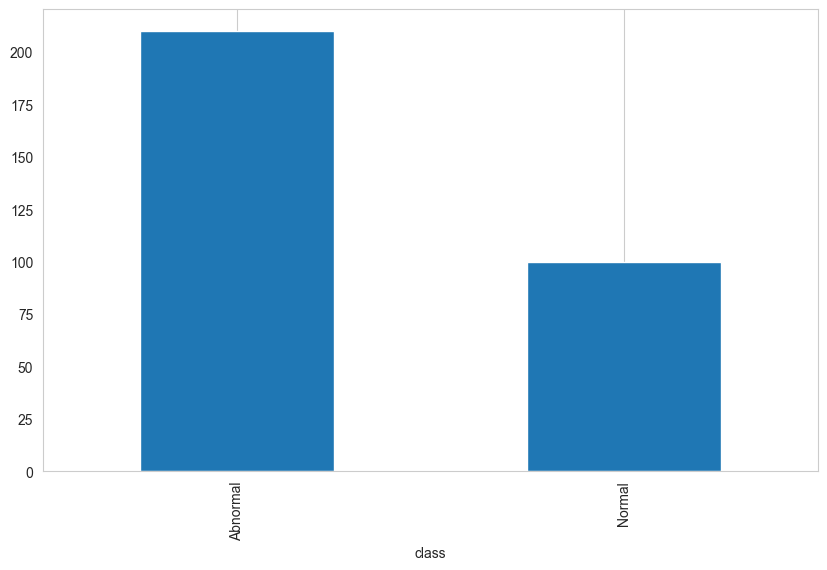

In [66]:
data['class'].value_counts().plot.bar(figsize=(10, 6))
plt.grid(axis='y')

In [67]:
data['class'].value_counts(normalize=True)

class
Abnormal    0.677419
Normal      0.322581
Name: proportion, dtype: float64

Здесь же можно прикинуть наш **baseline** качества, с которым можно будет сравнивать результаты работы модели. Если у нас 68% одного класса и 32% другого, то даже если наша модель будет предсказывать сплошные `Abnormal`, то `accuracy` будет равна, в среднем, 68%.

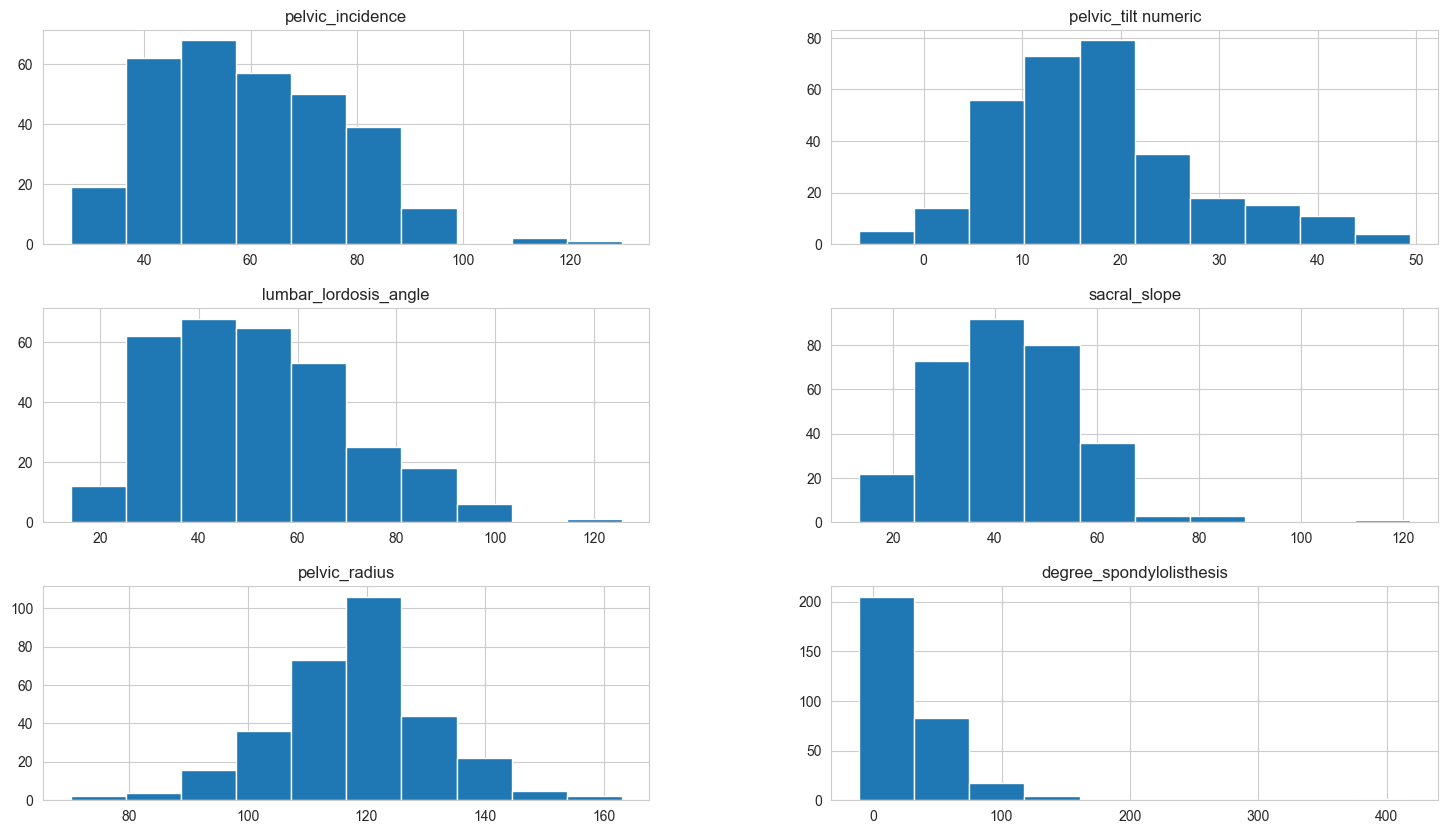

In [68]:
data.hist(figsize=(18, 10));

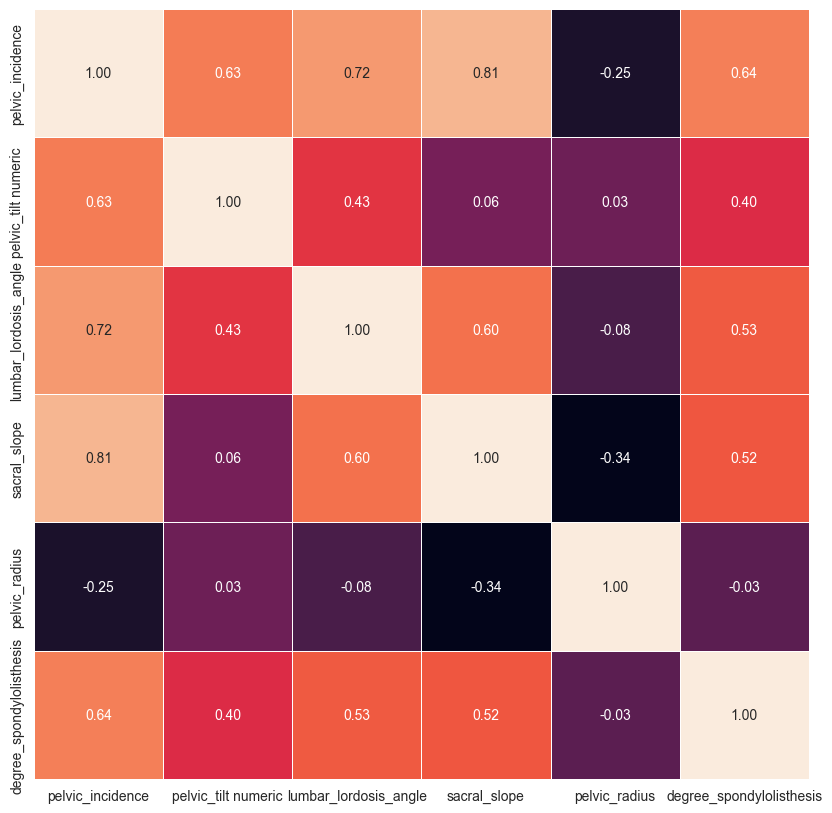

In [69]:
#correlation map
# data['class'] = data['class'].apply(lambda x: 1 if x=='Abnormal' else 0)
plt.figure(figsize=(10, 10))
sns.heatmap(data.iloc[:, :6].corr(), annot=True, cbar=False, linewidths=.5, fmt= '.2f')
plt.show()

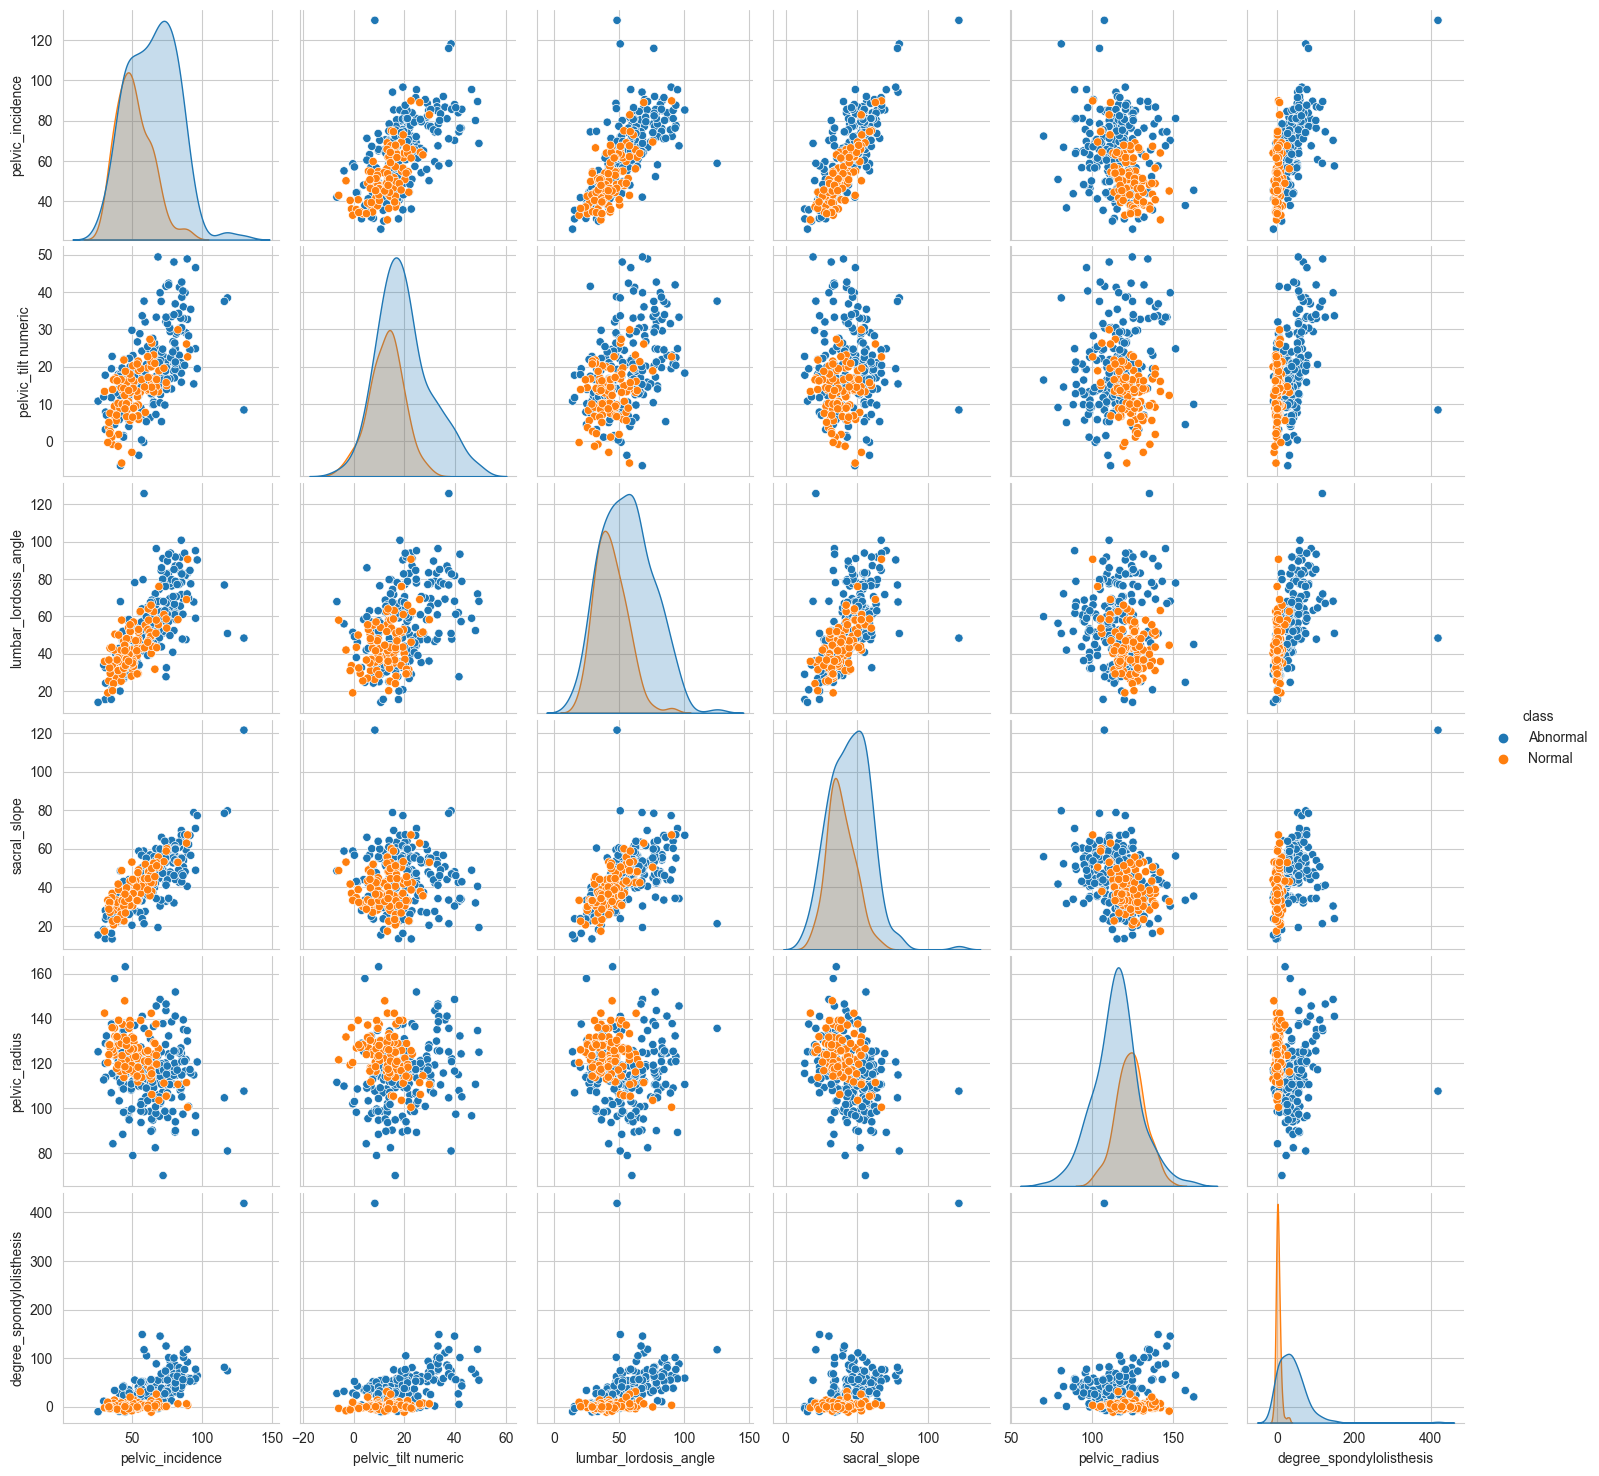

In [70]:
sns.pairplot(data, hue='class');

In [71]:
# plotly library
#import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
#import graph objects as "go"
from chart_studio import plotly as py
import plotly.graph_objs as go

# creating trace1
trace1 =go.Scatter(
                    x = np.arange(0,310),
                    y = data[data['class']=='Normal'].sacral_slope,
                    mode = "markers",
                    name = "Normal",
                    marker = dict(color = 'rgba(0, 100, 255, 0.8)'),
                    text= data['class'])
# creating trace2
trace2 =go.Scatter(
                    x = np.arange(0,310),
                    y = data[data['class']=='Abnormal'].sacral_slope,
                    mode = "markers",
                    name = "Abnormal",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= data['class'])

df = [trace1, trace2]
layout = dict(title = 'sacral_slope',
              xaxis= dict(title= 'index',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Values',ticklen= 5,zeroline= False)
             )
fig = dict(data = df, layout = layout)
iplot(fig)

## Перекодируем целевую

In [72]:
data['class'] = data['class'].apply(lambda x: 1 if x=='Abnormal' else 0)

In [73]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


## Train-test split

Параметр `stratify` позволяет вам создавать такие разбиения, в которых распределения указанной переменной будут сохраняться. Очень полезно при дисбалансе классов, т.е. когда каких-то классов гораздо больше, чем других. 

Попробуйте ответить, почему?

In [74]:
data[['class']].value_counts(normalize=True)

class
1        0.677419
0        0.322581
Name: proportion, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['class'], axis=1), data['class'], test_size=0.20, random_state=42, stratify=data['class']
)

In [75]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((600, 2), (400, 2), (600,), (400,))

In [76]:
y_train.value_counts(normalize=True)

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [ ]:
y_test.value_counts(normalize=True)

## Scaling
### Важно! 
Учим на трейне - применяем на тесте. Практически все методы препроцессинга так или иначе используют информацию из выборки, например, при стандартизации считается среднее и дисперсия, значит, мы не хотим, чтобы информация из отложенной выборки просачивалась в тренировочную (data leak). 

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Подбор параметров разными способами

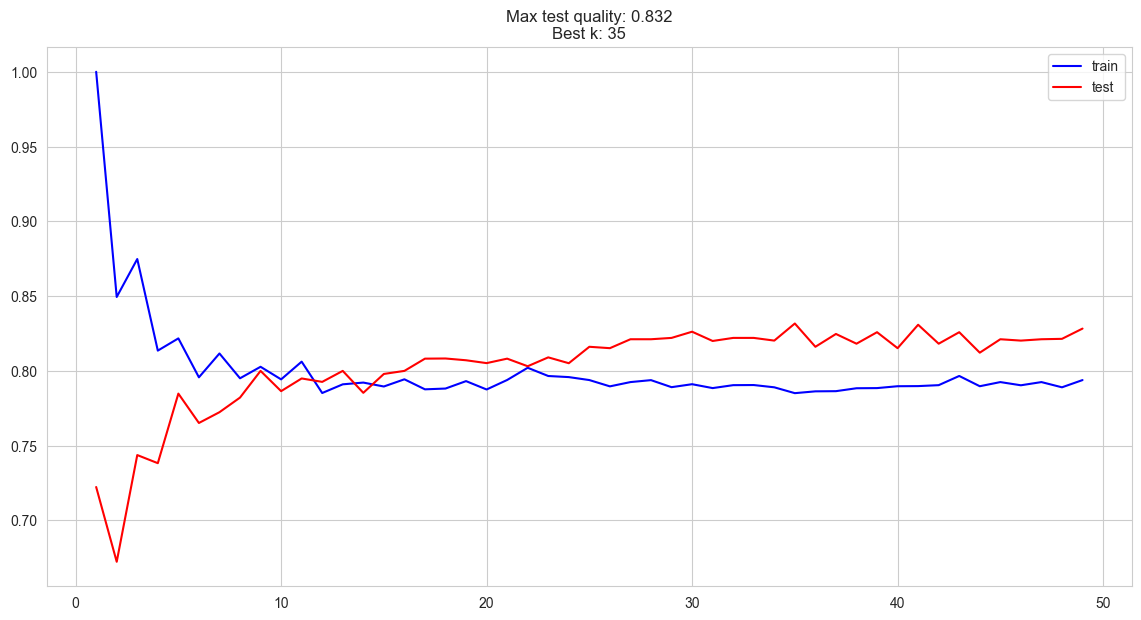

In [78]:
neighbors = range(1, 50)
f1_score_train = []
f1_score_test = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    f1_score_train.append(f1_score(knn.predict(X_train_scaled), y_train))
    f1_score_test.append(f1_score(knn.predict(X_test_scaled), y_test))

plt.figure(figsize=(14, 7))
plt.plot(neighbors, f1_score_train, color='blue', label='train')
plt.plot(neighbors, f1_score_test, color='red', label='test')
plt.title("Max test quality: {:.3f}\nBest k: {}".format(max(f1_score_test), np.argmax(f1_score_test)+1))
plt.legend();

## GridSearchCV

In [81]:
%%time
from sklearn.model_selection import GridSearchCV

param_grid = {
        'n_neighbors': range(1, 50),
        'p': range(1, 4)
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_scaled, y_train)

print("Best CV score: {:.3f}, best CV k: {}".format(
    grid_search.best_score_, grid_search.best_estimator_.n_neighbors)
) 


test_predictions = grid_search.best_estimator_.predict(X_test_scaled)
print("Resulting test score: {:.3f}".format(f1_score(test_predictions, y_test)))

Best CV score: 0.793, best CV k: 35
Resulting test score: 0.828
CPU times: user 6.6 s, sys: 119 ms, total: 6.72 s
Wall time: 6.96 s


## RandomizedSearchCV

In [80]:
%%time
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_neighbors': range(1, 50),
    'p': range(1, 4)
}

knn = KNeighborsClassifier()

rand_search = RandomizedSearchCV(knn, param_grid, cv=5, scoring='f1', random_state=40)
rand_search.fit(X_train_scaled, y_train)

print("Best CV score: {:.3f}, best CV k: {}".format(
    rand_search.best_score_, rand_search.best_estimator_.n_neighbors)
) 

test_predictions = rand_search.best_estimator_.predict(X_test_scaled)
print("Resulting test score: {:.3f}".format(f1_score(test_predictions, y_test)))


Best CV score: 0.783, best CV k: 17
Resulting test score: 0.801
CPU times: user 485 ms, sys: 11 ms, total: 496 ms
Wall time: 499 ms


### Дополнительные материалы:
- http://www.machinelearning.ru/wiki/index.php?title=Метод_ближайших_соседей
- http://scikit-learn.org/stable/modules/neighbors.html
- http://bigdata-madesimple.com/k-nearest-neighbors-curse-dimensionality-python-scikit-learn/
- https://www.kaggle.com/skalskip/iris-data-visualization-and-knn-classification